In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
 #drop car_name column
 df = df.drop(columns=['Car_Name'])
 df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#convert categorical to numerical
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,True,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,True,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,True,False,False,False,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,True,False,False,False,False,True,False,False,True


In [ ]:
X = df_encoded.drop("Selling_Price",axis=1)
y = df_encoded['Selling_Price']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#train ml model(random forest)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.9029916165163913
Mean Absolute Error: 0.611310655737704
R2 Score: 0.9608001431124521


In [51]:
def predict_car_price(year, present_price, kms_driven, owner, company, fuel_type, seller_type, transmission):

    input_data_raw = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Owner': [owner],
        'company': [company],
        'Fuel_Type': [fuel_type],
        'Seller_Type': [seller_type],
        'Transmission': [transmission]
    })

    input_data_encoded = pd.get_dummies(input_data_raw, drop_first=True, columns=['company', 'Fuel_Type', 'Seller_Type', 'Transmission'])


    input_data_final = input_data_encoded.reindex(columns=X.columns, fill_value=0)


    prediction = rf.predict(input_data_final)
    return prediction[0]

In [73]:
price=predict_car_price(
    year=2016,
    present_price=7.0,
    kms_driven=1000000,
    owner=2,
    company='Maruti',
    fuel_type='disel',
    seller_type='Individual',
    transmission='Manual'

)
print("predicted selling price:",price)

predicted selling price: 4.7855


In [47]:
#install & import SHAP
!pip install shap
import shap
shap.initjs()

In [68]:
#create SHAP explainer
explainer = shap.TreeExplainer(rf)

In [69]:
#calculate SHAP values
shap_values = explainer.shap_values(X_test)

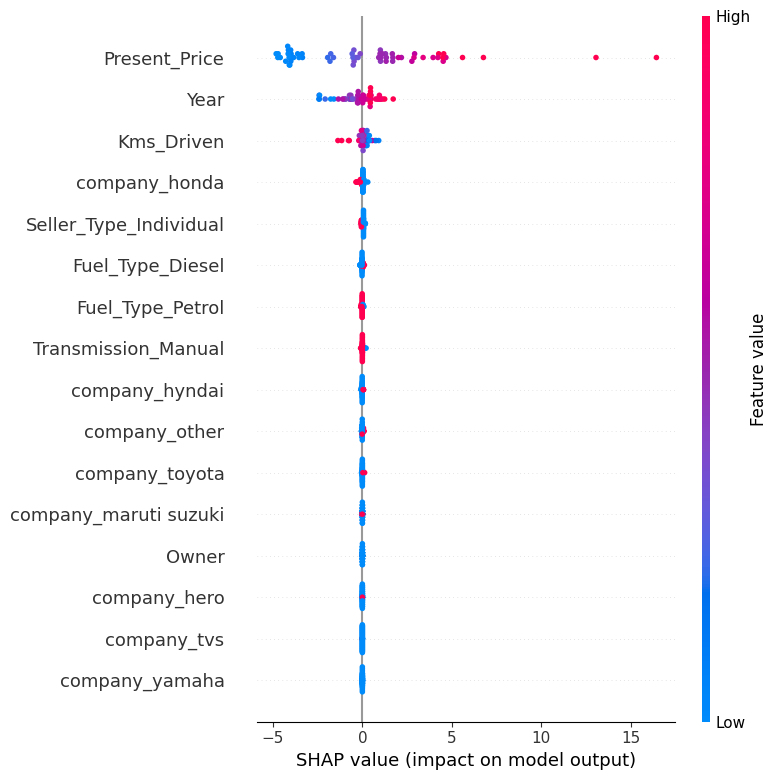

In [70]:
#global explanation
shap.summary_plot(shap_values, X_test)

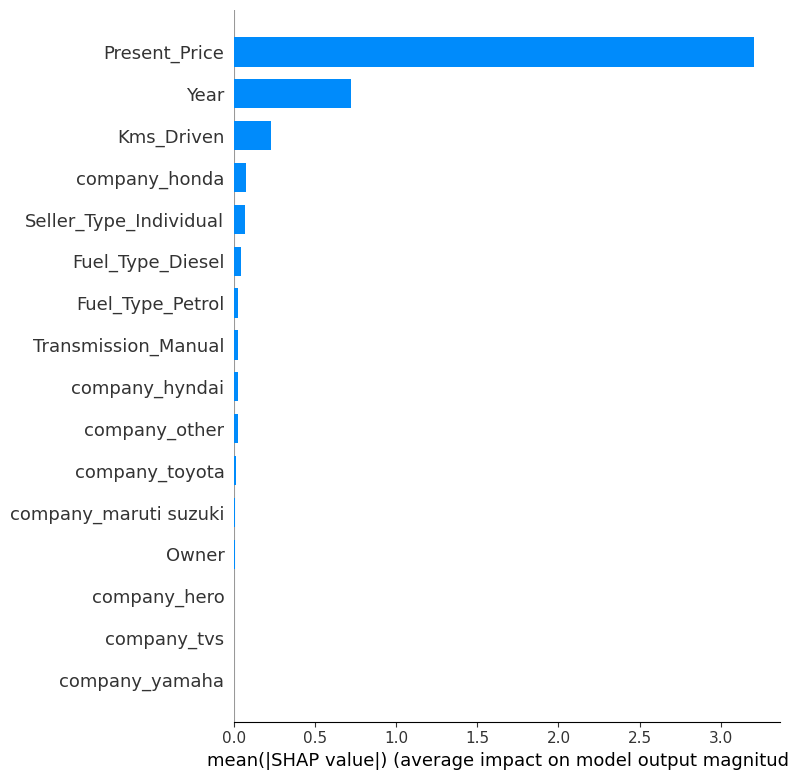

In [71]:
#bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

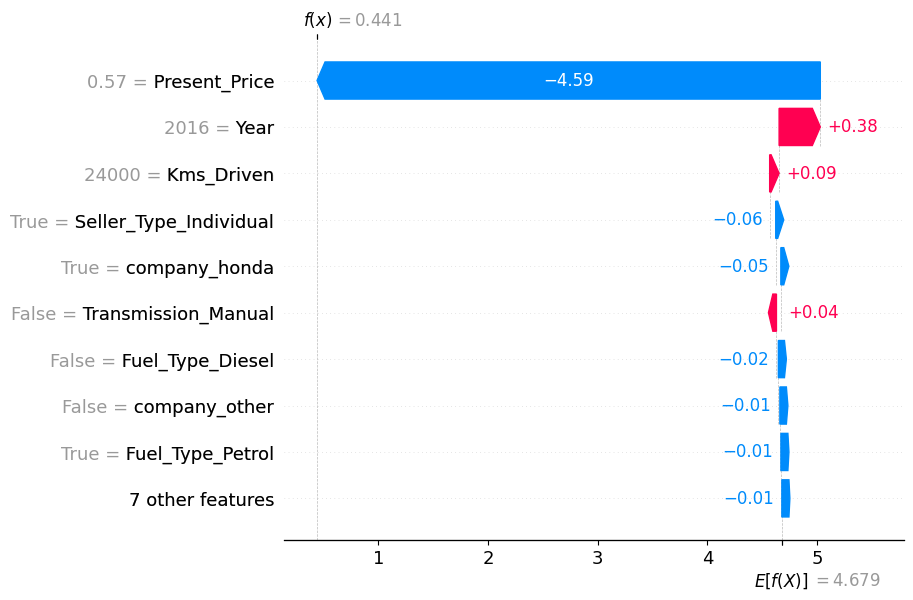

In [74]:
#waterfall plot
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_test.iloc[0],
        feature_names=X_train.columns
    )
)